<a href="https://colab.research.google.com/github/debasmita93/Hackathon_Summer_Analytics/blob/main/Summer_Analytics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

### As Train data is in time series thus first extracting the date/month/year then sorting accoring to time

In [ ]:
df_train = pd.read_csv('/kaggle/input/guwahati-hackathon1/hacktrain.csv')

if 'Unnamed: 0' in df_train.columns:
    df_train.drop(columns=['Unnamed: 0'], inplace=True)


ndvi_cols = [col for col in df_train.columns if col.endswith('_N')]


rename_dict = {}
for col in ndvi_cols:
    date_str = col.split('_')[0]
    dt = pd.to_datetime(date_str, format='%Y%m%d')
    new_name = dt.strftime("%d_%b'%y")
    rename_dict[col] = new_name


df_train.rename(columns=rename_dict, inplace=True)


static_cols = ['ID', 'class']
sorted_ndvi_cols = sorted(rename_dict.values(), key=lambda x: pd.to_datetime(x, format="%d_%b'%y"))
df_train = df_train[static_cols + sorted_ndvi_cols]


print("Renamed columns:")
print(df_train.columns[:10])


Renamed columns:
Index(['ID', 'class', '01_Jan'14', '17_Jan'14', '02_Feb'14', '18_Feb'14',
       '22_Mar'14', '07_Apr'14', '23_Apr'14', '09_May'14'],
      dtype='object')


In [ ]:
df_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,class,01_Jan'14,17_Jan'14,02_Feb'14,18_Feb'14,22_Mar'14,07_Apr'14,23_Apr'14,09_May'14,...,25_Jan'15,10_Feb'15,26_Feb'15,14_Mar'15,30_Mar'15,15_Apr'15,01_May'15,17_May'15,02_Jun'15,20_Jul'15
0,1,water,433.906,-1180.19,-2203.020,211.328,NaN,NaN,267.138,-1942.490,...,-944.084,-1325.640,NaN,630.087,-1739.990,997.904,-1924.36,-1882.030,658.668,637.5950
1,2,water,524.075,-1360.56,-2250.000,220.878,476.972,364.858,120.059,-625.385,...,-989.285,-1408.640,-1670.590,707.626,-692.386,914.198,-1672.32,-1625.790,593.705,634.2400
2,4,water,-1343.550,NaN,-2202.120,369.214,NaN,304.621,-1227.800,NaN,...,NaN,-3162.140,729.790,NaN,-1564.630,NaN,-1052.63,NaN,-1599.160,58.0174
3,5,water,-826.727,NaN,-2197.360,298.320,282.833,432.150,-924.073,NaN,...,-1267.540,-2829.400,683.254,-802.942,-1413.180,515.805,-1256.93,380.436,NaN,72.5180
4,8,water,-1357.140,-568.05,-116.801,1660.650,1020.720,-113.406,-384.915,-279.317,...,-2646.050,1242.870,NaN,2158.980,NaN,1935.800,1647.83,NaN,NaN,1136.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,433.659,NaN,979.795,362.882,465.843,369.082,NaN,1044.110,...,1040.990,944.619,943.698,823.896,1072.700,937.478,1166.25,NaN,984.620,1207.7000
7996,10539,impervious,506.936,1589.06,771.747,446.724,485.204,762.633,NaN,1379.660,...,1142.340,1372.680,1401.970,1422.860,1262.110,983.911,1478.71,1361.000,1419.720,2170.3500
7997,10542,impervious,1247.770,2501.72,1818.650,1095.000,1170.880,1441.460,1190.830,1232.110,...,2377.550,2693.630,NaN,1471.600,1057.150,1930.380,1033.56,NaN,1454.740,1895.6800
7998,10543,impervious,388.346,NaN,3759.710,NaN,744.143,277.296,433.177,4515.800,...,2676.000,NaN,770.469,1614.750,4473.050,1146.820,4391.05,413.412,1283.320,3465.7400


### As Test data is in time series thus first extracting the date/month/year then sorting accoring to time

In [ ]:
df_test = pd.read_csv('/kaggle/input/guwahati-hackathon1/hacktest.csv')
ndvi_cols_test = [col for col in df_test.columns if col.endswith('_N')]


rename_dict_test = {}
for col in ndvi_cols_test:
    date_str = col.split('_')[0]
    dt = pd.to_datetime(date_str, format='%Y%m%d')
    new_name = dt.strftime("%d_%b'%y")
    rename_dict_test[col] = new_name


df_test.rename(columns=rename_dict_test, inplace=True)


static_cols = ['ID']
sorted_ndvi_cols_test = sorted(rename_dict_test.values(), key=lambda x: pd.to_datetime(x, format="%d_%b'%y"))
df_test = df_test[static_cols + sorted_ndvi_cols_test]


print("Renamed df_test columns:")
print(df_test.columns[:10])


Renamed df_test columns:
Index(['ID', '01_Jan'14', '17_Jan'14', '02_Feb'14', '18_Feb'14', '22_Mar'14',
       '07_Apr'14', '23_Apr'14', '09_May'14', '25_May'14'],
      dtype='object')


In [ ]:
df_test

,ID,01_Jan'14,17_Jan'14,02_Feb'14,18_Feb'14,22_Mar'14,07_Apr'14,23_Apr'14,09_May'14,25_May'14,...,25_Jan'15,10_Feb'15,26_Feb'15,14_Mar'15,30_Mar'15,15_Apr'15,01_May'15,17_May'15,02_Jun'15,20_Jul'15
0,1,6639.760,601.843,4736.75,527.268,2695.5700,340.949,6378.42,4704.14,927.115,...,6742.570,2829.130,6766.42000,3097.110,3923.84,489.4030,5625.45,5761.000,413.162,7466.4200
1,2,842.101,1070.440,6942.68,3298.110,1234.1400,4366.790,4885.27,5216.12,5103.040,...,6908.180,7268.220,1051.69000,2513.990,6668.54,1618.0500,6085.14,1027.560,6037.350,7235.2600
2,3,831.441,1036.560,6928.93,2206.100,1789.9900,4897.450,5704.41,7021.69,6204.540,...,6086.560,7002.630,1504.29000,814.458,7644.43,861.0610,7408.93,1177.940,6969.980,7425.0800
3,4,6883.610,824.584,6734.72,1287.000,685.9060,586.287,5572.90,1045.57,5794.150,...,690.408,2176.800,6935.22000,1649.120,7128.42,465.9790,6441.61,6311.930,1731.620,7119.1200
4,5,1336.920,1857.800,7937.68,3283.940,1413.5200,4511.700,4596.13,7413.43,6996.760,...,8001.350,7951.440,1094.51000,4122.530,7937.60,1001.2100,7879.53,1482.540,8130.260,7519.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2841,356.233,-2630.590,-4885.15,221.920,209.4030,306.483,-2295.30,-1699.10,-2582.420,...,-4402.210,-4293.570,-4738.97000,-2881.100,-2275.03,64.4464,-2738.44,-2451.190,-2514.480,-1673.7400
2841,2842,-4316.580,324.637,-5109.01,-86.414,71.3402,-2853.890,-2687.18,-2109.84,-2614.910,...,-5193.280,-5648.660,-4416.11000,-3155.740,-2162.68,-2168.1900,-2363.82,-1795.400,-412.727,-96.8233
2842,2843,-1170.750,412.115,-4259.30,254.548,291.8000,433.852,-1988.23,-3820.43,-1756.080,...,-3354.430,-4211.420,-5010.32000,-3088.730,-2230.40,465.6220,-1713.40,-1422.090,-155.592,-2364.6000
2843,2844,460.419,298.739,-5574.51,276.948,369.0970,511.792,-3109.07,-3472.65,-2018.450,...,-2857.540,-192.857,-3237.74000,-3210.560,-2442.51,438.4180,-1113.89,180.122,-1217.120,-3004.6300


# PROBLEM 1 checking Imbalance for TRAIN DATASET

In [ ]:
df_train["class"].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

### We can see the number of data in each category

####  forest        6159
#### farm           841
#### impervious     669
#### grass          196
#### water          105
#### orchard         30

# Thus there is Imbalance in data as forest has 6159 rows and orchard has 30 rows only thus under-represented Hence we have to fix it
But model can Take care of It



In [ ]:
df_train[df_train["class"]=='water'].iloc[:,2]

0        433.906
1        524.075
2      -1343.550
3       -826.727
4      -1357.140
          ...   
6195     439.997
6211     978.801
6234     579.551
6235     459.855
7108     487.143
Name: 01_Jan'14, Length: 105, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


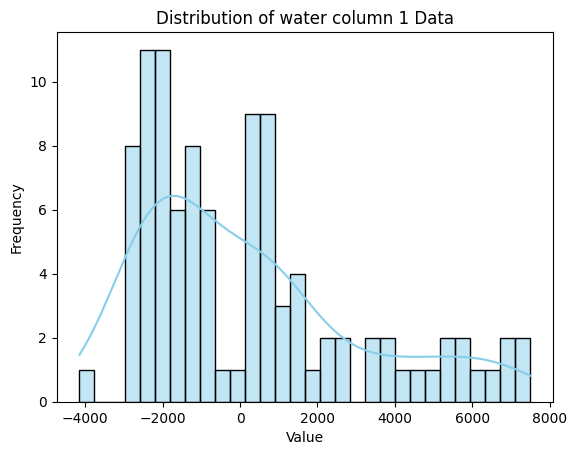

In [ ]:
data = df_train[df_train["class"]=='water'].iloc[:,2]
sns.histplot(data=data, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of water column 1 Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


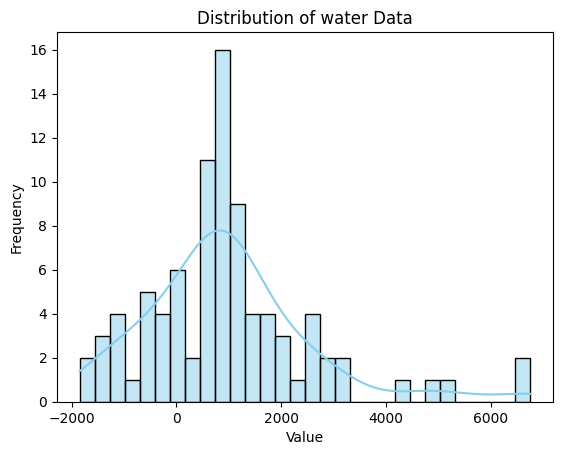

In [ ]:
data = df_train[df_train["class"]=='water'].iloc[:,3]
sns.histplot(data=data, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of water Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


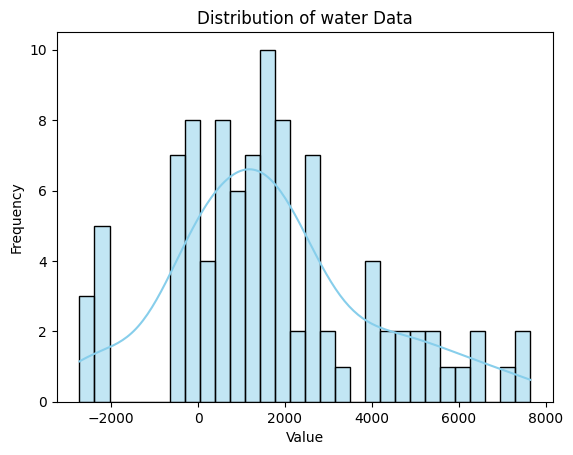

In [ ]:
data = df_train[df_train["class"]=='water'].iloc[:,4]
sns.histplot(data=data, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of water Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

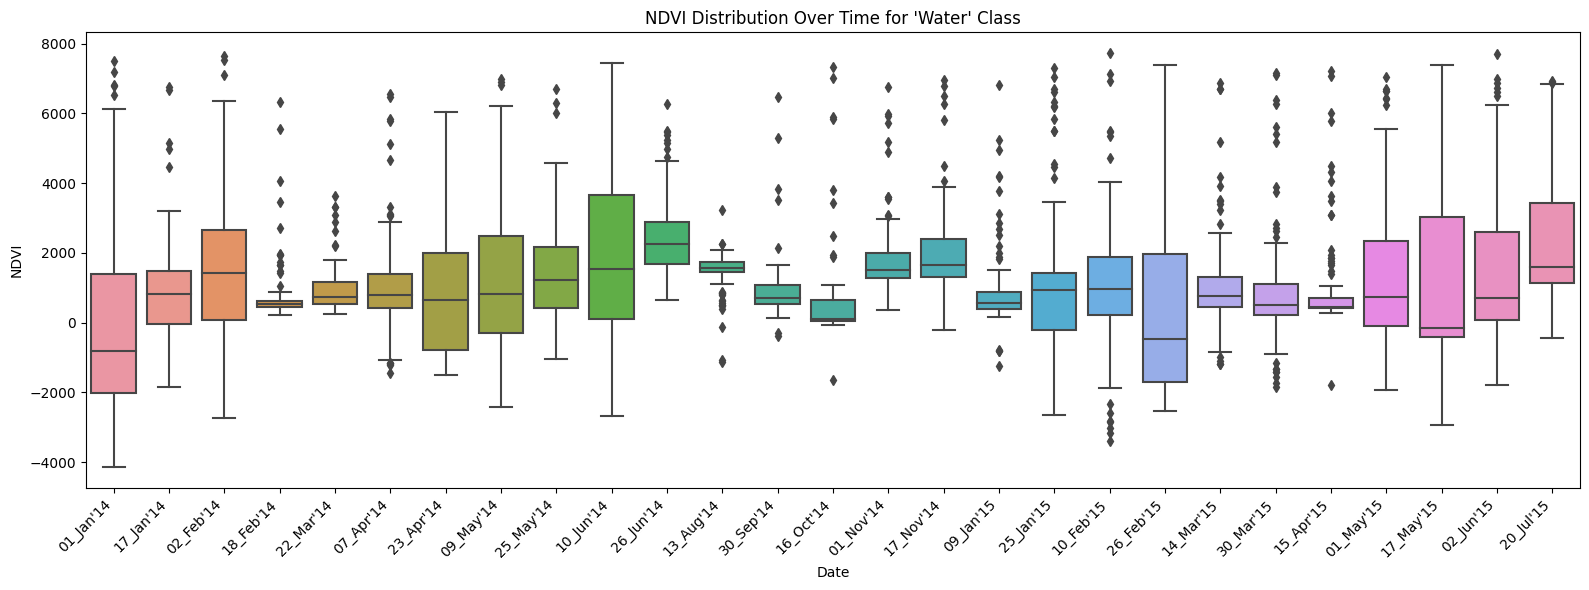

In [ ]:
df_water = df_train[df_train['class'] == 'water']


df_water_melted = df_water.melt(id_vars=['ID', 'class'], var_name='Date', value_name='NDVI')

plt.figure(figsize=(16, 6))
sns.boxplot(x='Date', y='NDVI', data=df_water_melted)
plt.xticks(rotation=45, ha='right')
plt.title("NDVI Distribution Over Time for 'Water' Class")
plt.tight_layout()
plt.show()


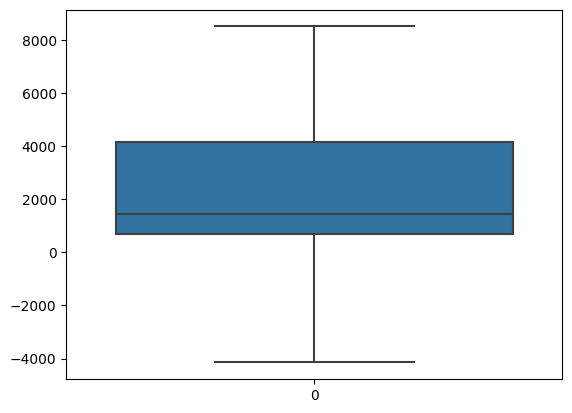

In [ ]:
df = df_train.iloc[:,2]
sns.boxplot( data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


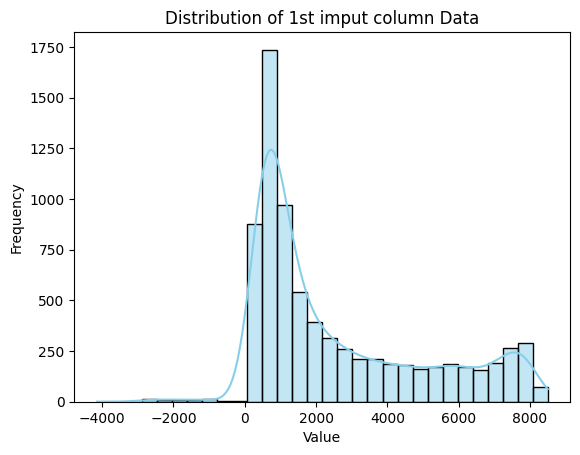

In [ ]:
data = df_train.iloc[:,2]
sns.histplot(data=data, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of 1st imput column Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# See the first column is Right skewed

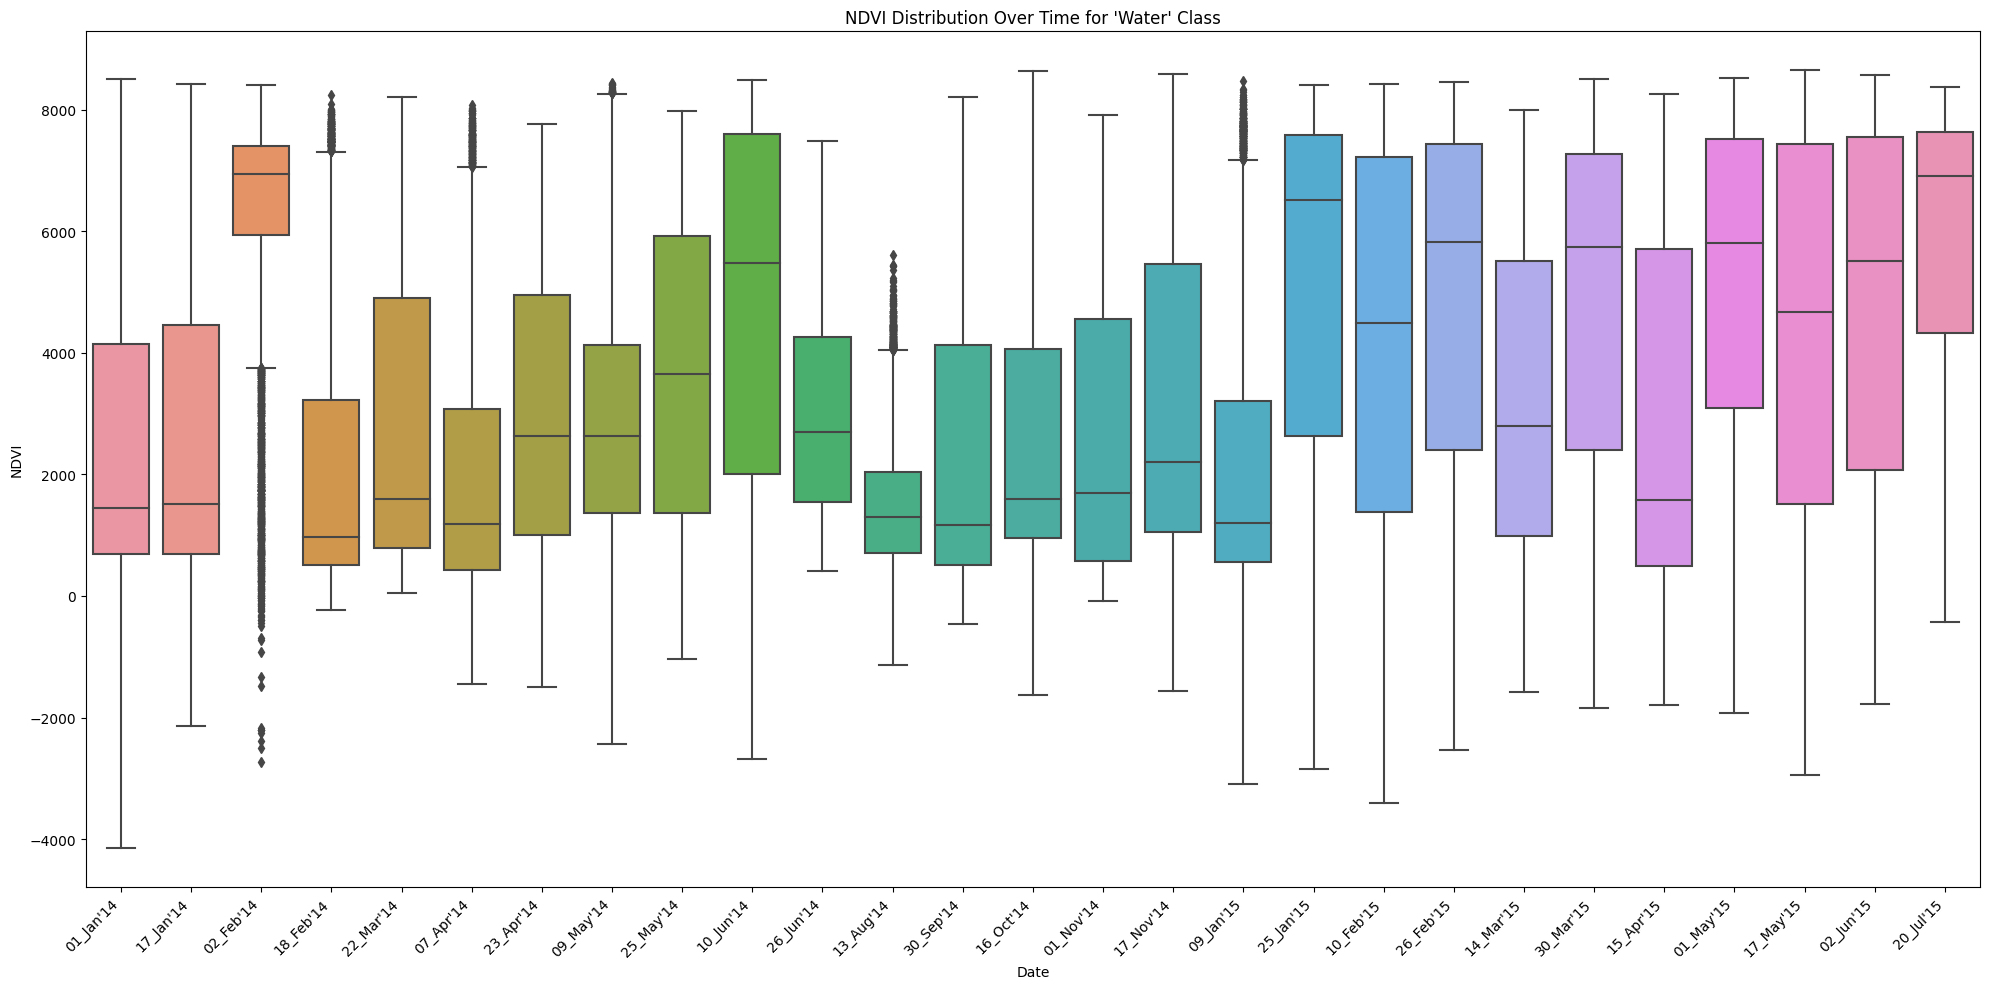

In [ ]:
# Filter only 'water' class
df_water = df_train

# Melt the dataframe: columns become 'Date', values become 'NDVI'
df_water_melted = df_water.melt(id_vars=['ID', 'class'], var_name='Date', value_name='NDVI')


plt.figure(figsize=(20, 10))
sns.boxplot(x='Date', y='NDVI', data=df_water_melted)
plt.xticks(rotation=45, ha='right')
plt.title("NDVI Distribution Over Time for 'Water' Class")
plt.tight_layout()
plt.show()

In [ ]:
df_water = df_train[df_train["class"]=='water']

In [ ]:
df_water

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,class,01_Jan'14,17_Jan'14,02_Feb'14,18_Feb'14,22_Mar'14,07_Apr'14,23_Apr'14,09_May'14,...,25_Jan'15,10_Feb'15,26_Feb'15,14_Mar'15,30_Mar'15,15_Apr'15,01_May'15,17_May'15,02_Jun'15,20_Jul'15
0,1,water,433.906,-1180.190,-2203.020,211.328,NaN,NaN,267.138,-1942.490,...,-944.084,-1325.64,NaN,630.0870,-1739.990,997.904,-1924.360,-1882.030,658.668,637.5950
1,2,water,524.075,-1360.560,-2250.000,220.878,476.972,364.858,120.059,-625.385,...,-989.285,-1408.64,-1670.590,707.6260,-692.386,914.198,-1672.320,-1625.790,593.705,634.2400
2,4,water,-1343.550,NaN,-2202.120,369.214,NaN,304.621,-1227.800,NaN,...,NaN,-3162.14,729.790,NaN,-1564.630,NaN,-1052.630,NaN,-1599.160,58.0174
3,5,water,-826.727,NaN,-2197.360,298.320,282.833,432.150,-924.073,NaN,...,-1267.540,-2829.40,683.254,-802.9420,-1413.180,515.805,-1256.930,380.436,NaN,72.5180
4,8,water,-1357.140,-568.050,-116.801,1660.650,1020.720,-113.406,-384.915,-279.317,...,-2646.050,1242.87,NaN,2158.9800,NaN,1935.800,1647.830,NaN,NaN,1136.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,7545,water,439.997,3209.540,6362.150,5548.830,NaN,2759.270,4191.020,NaN,...,6187.710,2901.97,5817.550,5171.0500,5189.370,4315.650,6408.730,7155.550,NaN,5665.3500
6211,7564,water,978.801,1243.920,-2496.290,1664.990,849.678,537.111,NaN,8.773,...,-1782.350,-3403.05,857.368,1287.0000,-1848.910,-1794.870,-596.105,392.978,-1781.790,929.1060
6234,7598,water,579.551,1843.300,1798.970,543.712,1139.600,1532.880,NaN,2088.300,...,904.902,2208.92,-457.866,-51.6188,927.891,1718.700,2018.110,NaN,NaN,2716.2400
6235,7600,water,459.855,629.407,781.111,429.446,521.186,395.676,2140.820,609.884,...,1461.380,1690.76,538.667,816.3330,-670.783,3641.950,-466.589,469.093,NaN,-58.5707


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Filter water class
df_water = df_train[df_train["class"] == 'water']

# Get only NDVI columns (assuming first two are ID and class)
ndvi_cols = df_water.columns[2:]

# Store results
results = []

for col in ndvi_cols:
    # Group A: rows where the column is NOT missing
    group_not_missing = df_water[df_water[col].notnull()]
    # Group B: rows where the column IS missing
    group_missing = df_water[df_water[col].isnull()]

    # Skip if group_missing or group_not_missing is too small
    if len(group_not_missing) < 5 or len(group_missing) < 5:
        continue

    # Apply T-test between the distributions of other columns
    p_values = {}
    for compare_col in ndvi_cols:
        if compare_col == col:
            continue

        # Drop NaNs for valid t-test comparison
        a = group_not_missing[compare_col].dropna()
        b = group_missing[compare_col].dropna()

        # Only if both groups have at least 5 valid points
        if len(a) >= 5 and len(b) >= 5:
            t_stat, p_val = ttest_ind(a, b, equal_var=False)
            p_values[compare_col] = p_val

    # Average p-value over all comparisons to assess randomness
    avg_p_value = np.mean(list(p_values.values())) if p_values else np.nan

    results.append({
        'column': col,
        'group_not_missing_size': len(group_not_missing),
        'group_missing_size': len(group_missing),
        'avg_p_value_vs_others': avg_p_value
    })

# Convert to DataFrame
ttest_results_df = pd.DataFrame(results)

# Sort by avg p-value
ttest_results_df.sort_values(by='avg_p_value_vs_others', inplace=True)

# Display
ttest_results_df


,column,group_not_missing_size,group_missing_size,avg_p_value_vs_others
23,01_May'15,94,11,0.114075
2,02_Feb'14,97,8,0.253921
20,14_Mar'15,98,7,0.303547
8,25_May'14,96,9,0.359378
22,15_Apr'15,99,6,0.362068
9,10_Jun'14,98,7,0.376838
14,01_Nov'14,99,6,0.387297
12,30_Sep'14,86,19,0.418834
17,25_Jan'15,99,6,0.453443
5,07_Apr'14,97,8,0.460511


In [ ]:
# Get month from each column
month_map = {col: pd.to_datetime(col, format="%d_%b'%y").month for col in df_test.columns[1:]}

# Reverse map: month -> list of columns
from collections import defaultdict
month_columns = defaultdict(list)
for col, month in month_map.items():
    month_columns[month].append(col)

# Compute average NDVI per month from CLEAN TEST data
monthly_means = {}
for month, cols in month_columns.items():
    monthly_means[month] = df_test[cols].mean(axis=1)


In [ ]:
df_train_imputed = df_train.copy()
for col in df_train.columns[2:]:
    month = pd.to_datetime(col, format="%d_%b'%y").month
    # Impute missing values with average pattern from clean test data
    impute_vals = monthly_means[month].mean()  # scalar
    df_train_imputed[col].fillna(impute_vals, inplace=True)


/tmp/ipykernel_35/1052489530.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_imputed[col].fillna(impute_vals, inplace=True)


In [ ]:
features = pd.DataFrame()
features['ndvi_mean'] = df_train_imputed.iloc[:, 2:].mean(axis=1)
features['ndvi_std'] = df_train_imputed.iloc[:, 2:].std(axis=1)
features['ndvi_min'] = df_train_imputed.iloc[:, 2:].min(axis=1)
features['ndvi_max'] = df_train_imputed.iloc[:, 2:].max(axis=1)
features['ndvi_median'] = df_train_imputed.iloc[:, 2:].median(axis=1)
features['ndvi_skew'] = df_train_imputed.iloc[:, 2:].skew(axis=1)
features['ndvi_kurtosis'] = df_train_imputed.iloc[:, 2:].kurtosis(axis=1)


In [ ]:
# Custom seasonal grouping
season_map = {1: 'winter', 2: 'winter', 3: 'spring',
              4: 'spring', 5: 'spring', 6: 'summer',
              7: 'summer', 8: 'monsoon', 9: 'monsoon',
              10: 'fall', 11: 'fall', 12: 'winter'}

season_columns = defaultdict(list)
for col in df_train.columns[2:]:
    month = pd.to_datetime(col, format="%d_%b'%y").month
    season = season_map[month]
    season_columns[season].append(col)

# Compute seasonal features
for season, cols in season_columns.items():
    features[f'{season}_mean'] = df_train_imputed[cols].mean(axis=1)
    features[f'{season}_std'] = df_train_imputed[cols].std(axis=1)


In [ ]:
features['early_season_avg'] = df_train_imputed.iloc[:, 2:10].mean(axis=1)
features['late_season_avg'] = df_train_imputed.iloc[:, 17:].mean(axis=1)
features['ndvi_trend'] = features['late_season_avg'] - features['early_season_avg']


In [ ]:
features['missing_count'] = df_train.iloc[:, 2:].isna().sum(axis=1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report


df_train.drop(columns=[col for col in df_train.columns if 'Unnamed' in col], inplace=True)
df_test.drop(columns=[col for col in df_test.columns if 'Unnamed' in col], inplace=True)


y = df_train['class']
X = df_train.drop(columns=['ID', 'class'])
X_test = df_test.drop(columns=['ID'])


X.fillna(X.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


cols_right_skewed = [X.columns[i] for i in [0, 3, 7, 9, 17, 24]]
cols_left_skewed = [X.columns[i] for i in [4, 6, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26]]
cols_bimodal = [X.columns[i] for i in [1, 2, 5, 8]]
all_skewed_cols = list(set(cols_right_skewed + cols_left_skewed + cols_bimodal))


pt = PowerTransformer(method='yeo-johnson')
X[all_skewed_cols] = pt.fit_transform(X[all_skewed_cols])
X_test[all_skewed_cols] = pt.transform(X_test[all_skewed_cols])


X['row_mean'] = X.mean(axis=1)
X['row_std'] = X.std(axis=1)
X_test['row_mean'] = X_test.mean(axis=1)
X_test['row_std'] = X_test.std(axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


logreg = LogisticRegression(
    multi_class='ovr',
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)
logreg.fit(X_train, y_train)


y_val_pred = logreg.predict(X_val)


print("Macro F1 Score:", f1_score(y_val, y_val_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, target_names=le.classes_))


y_test_pred = logreg.predict(X_test_scaled)
y_test_labels = le.inverse_transform(y_test_pred)


submission = pd.DataFrame({'ID': df_test['ID'], 'class': y_test_labels})
submission.to_csv("submission.csv", index=False)
